In [ ]:
pip install catboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
import os
import plotly.express as px
from itertools import cycle
palette = cycle(px.colors.qualitative.Plotly)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploads = files.upload()

In [2]:
ds1 = pd.read_csv('mental-and-substance-use-as-share-of-disease -AI.csv')
ds2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder _AI.csv')
ds3 = pd.merge(ds1, ds2)

In [3]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

In [4]:
ds3 = ds3.set_axis(['Country','Code','Year','Mental disorder','Schizophrenia', 'Bipolar disorder', 'Eating disorder','Anxiety disorder','Drug usage disorder','Depressive disorder','Alcohol use disorder'], axis='columns')
ds3.head(5)

,Country,Code,Year,Mental disorder,Schizophrenia,Bipolar disorder,Eating disorder,Anxiety disorder,Drug usage disorder,Depressive disorder,Alcohol use disorder
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


Text(0.5, 1.0, 'Null values in Columns')

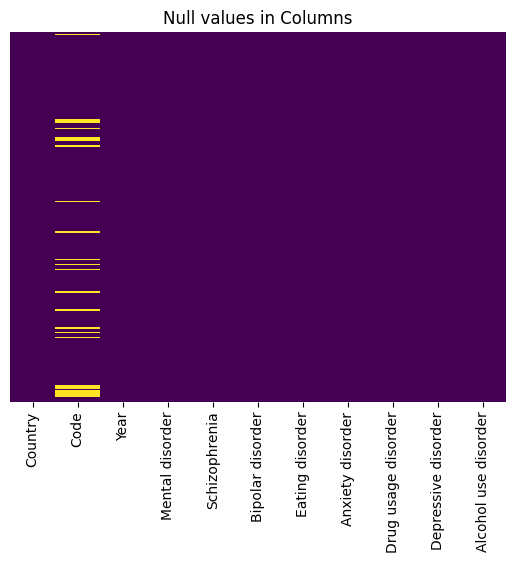

In [5]:
sns.heatmap(ds3.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title('Null values in Columns')

In [6]:
ds3=ds3.drop(['Code'],axis=1)

<Axes: >

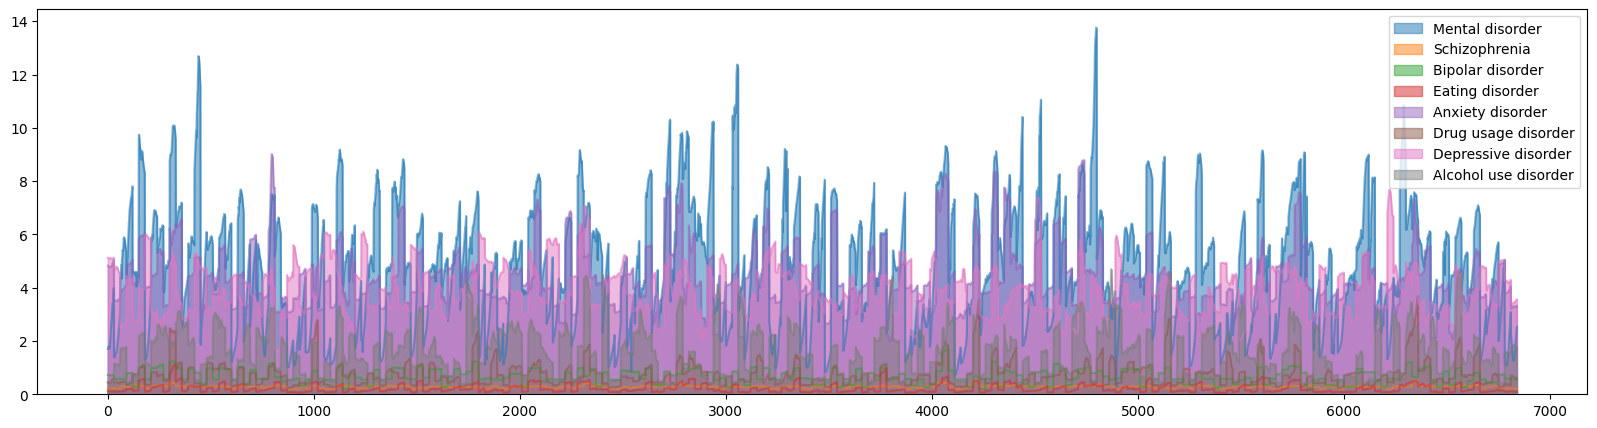

In [63]:
ds3.drop(['Year'],axis=1).plot(kind="area", stacked = False, figsize = (20,5))

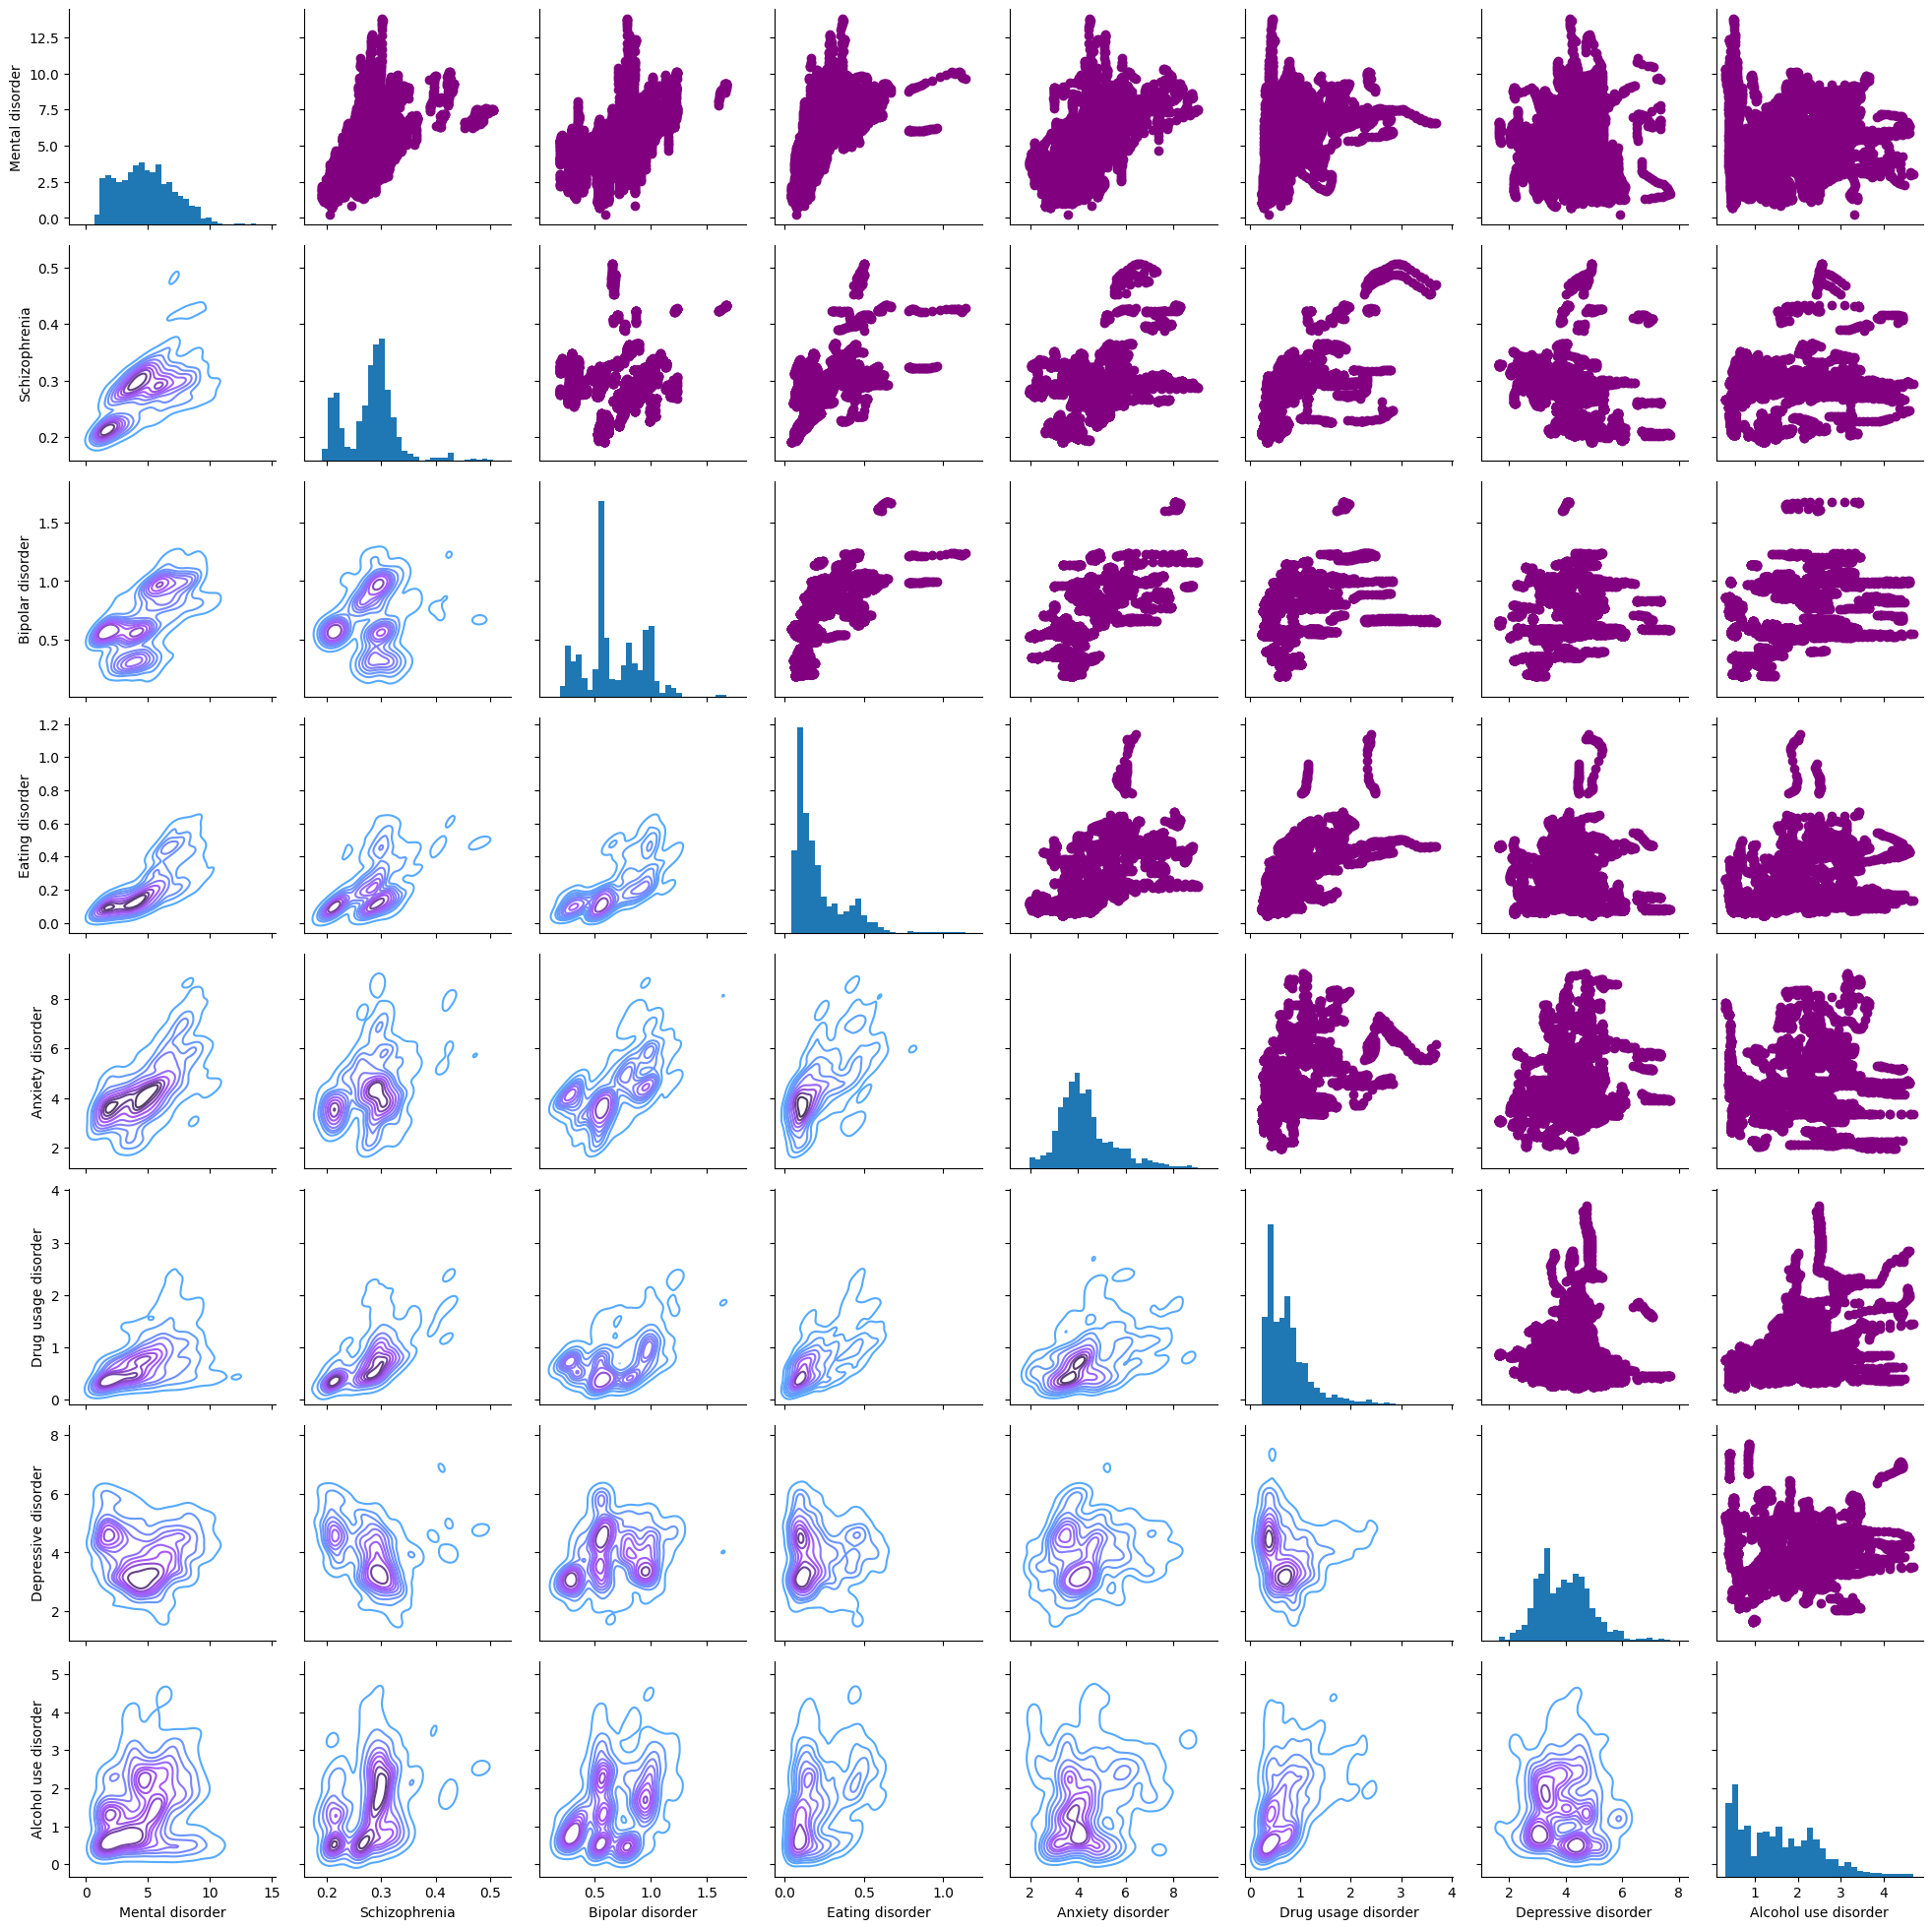

In [65]:
returns_fig1=sns.PairGrid(ds3.drop(['Year'],axis=1))
returns_fig1.map_upper(plt.scatter, color='purple')
returns_fig1.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig1.map_diag(plt.hist, bins=30)

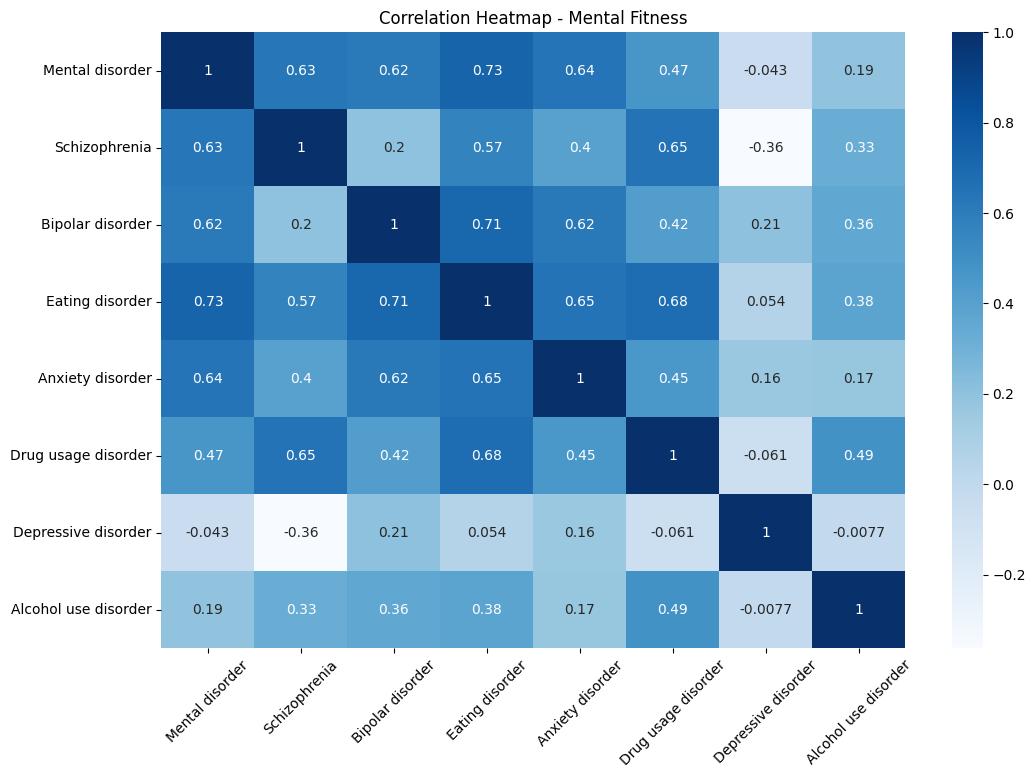

In [8]:
Corr = ds3.drop(['Country','Year'],axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(Corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap - Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [7]:
x = ds3.drop(['Country','Year','Mental disorder'],axis=1)
y = ds3['Mental disorder']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_rmse = (np.sqrt(mean_squared_error(y_test, forest_y_pred)))
forest_r2 = r2_score(y_test, forest_y_pred)

In [11]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(x_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_rmse = (np.sqrt(mean_squared_error(y_test, poly_y_pred)))
poly_r2 = r2_score(y_test, poly_y_pred)

In [12]:
# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = (np.sqrt(mean_squared_error(y_test, svr_y_pred)))
svr_r2 = r2_score(y_test, svr_y_pred)

In [13]:
# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = (np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
xgb_r2 = r2_score(y_test, xgb_y_pred)

In [14]:
# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = (np.sqrt(mean_squared_error(y_test, knn_y_pred)))
knn_r2 = r2_score(y_test, knn_y_pred)

In [15]:
# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(x_train, y_train)
bayesian_y_pred = bayesian_model.predict(x_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_rmse = (np.sqrt(mean_squared_error(y_test, bayesian_y_pred)))
bayesian_r2 = r2_score(y_test, bayesian_y_pred)

In [16]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_y_pred = tree_model.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = (np.sqrt(mean_squared_error(y_test, tree_y_pred)))
tree_r2 = r2_score(y_test, tree_y_pred)

In [17]:
# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(x_train, y_train)
nn_y_pred = nn_model.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_rmse = (np.sqrt(mean_squared_error(y_test, nn_y_pred)))
nn_r2 = r2_score(y_test, nn_y_pred)

In [18]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = (np.sqrt(mean_squared_error(y_test, gb_y_pred)))
gb_r2 = r2_score(y_test, gb_y_pred)

In [19]:
# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train, y_train)
ridge_y_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = (np.sqrt(mean_squared_error(y_test, ridge_y_pred)))
ridge_r2 = r2_score(y_test, ridge_y_pred)

In [20]:
# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(x_train, y_train)
lasso_y_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = (np.sqrt(mean_squared_error(y_test, lasso_y_pred)))
lasso_r2 = r2_score(y_test, lasso_y_pred)

In [21]:
# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(x_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_rmse = (np.sqrt(mean_squared_error(y_test, elastic_net_y_pred)))
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)

In [45]:
#SGDRegressor
from sklearn.preprocessing import StandardScaler
SGDRegressor_model = SGDRegressor(loss="huber", penalty="l1")
SGDRegressor_model.fit(x_train, y_train)
SGDRegressor_y_pred = SGDRegressor_model.predict(x_test)
SGDRegressor_mse = mean_squared_error(y_test, SGDRegressor_y_pred)
SGDRegressor_rmse = (np.sqrt(mean_squared_error(y_test, SGDRegressor_y_pred)))
SGDRegressor_r2 = r2_score(y_test, SGDRegressor_y_pred)

In [49]:
#CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=50, learning_rate=0.2, depth=15)
catboost_model.fit(x_train, y_train)
catboost_y_pred = catboost_model.predict(x_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_rmse = (np.sqrt(mean_squared_error(y_test, catboost_y_pred)))
catboost_r2 = r2_score(y_test, catboost_y_pred)

0:	learn: 1.9363125	total: 645ms	remaining: 31.6s
1:	learn: 1.6373320	total: 1.34s	remaining: 32.2s
2:	learn: 1.3960238	total: 2.08s	remaining: 32.6s
3:	learn: 1.2063702	total: 2.78s	remaining: 32s
4:	learn: 1.0500005	total: 3.49s	remaining: 31.4s
5:	learn: 0.9272661	total: 4.15s	remaining: 30.5s
6:	learn: 0.8280272	total: 4.73s	remaining: 29.1s
7:	learn: 0.7520851	total: 5.32s	remaining: 27.9s
8:	learn: 0.6900158	total: 5.87s	remaining: 26.8s
9:	learn: 0.6336176	total: 6.49s	remaining: 25.9s
10:	learn: 0.5889304	total: 7.08s	remaining: 25.1s
11:	learn: 0.5554000	total: 7.71s	remaining: 24.4s
12:	learn: 0.5235884	total: 8.29s	remaining: 23.6s
13:	learn: 0.4964219	total: 8.89s	remaining: 22.9s
14:	learn: 0.4743162	total: 9.5s	remaining: 22.2s
15:	learn: 0.4548032	total: 10.1s	remaining: 21.5s
16:	learn: 0.4376857	total: 10.7s	remaining: 20.8s
17:	learn: 0.4223960	total: 11.3s	remaining: 20s
18:	learn: 0.4099169	total: 11.8s	remaining: 19.3s
19:	learn: 0.3958839	total: 12.4s	remaining: 1

In [24]:
#KernelRidge
kernel_ridge_model = KernelRidge(alpha=1.0)
kernel_ridge_model.fit(x_train, y_train)
kernel_ridge_y_pred = kernel_ridge_model.predict(x_test)
kernel_ridge_mse = mean_squared_error(y_test, kernel_ridge_y_pred)
kernel_ridge_rmse = (np.sqrt(mean_squared_error(y_test, kernel_ridge_y_pred)))
kernel_ridge_r2 = r2_score(y_test, kernel_ridge_y_pred)

In [54]:
Model_Selection=pd.DataFrame({'Model':['Random Forest Regression', 'Polynomial Regression', 'Stochastic Gradient Descent Regression','Support Vector Regression', 'XGBoost Regression', 'Cat Boost Regression', 'K-Nearest Neighbors Regression', 'Bayesian Regression', 'Decision Tree Regression', 'Neural Network Regression', 'Gradient Boosting Regression', 'Ridge Regression', 'Kernel Ridge Regression', 'Lasso Regression', 'Elastic Net Regression'],
                              'MSE':[forest_mse, poly_mse, SGDRegressor_mse, svr_mse, xgb_mse, catboost_mse, knn_mse,  bayesian_mse, tree_mse, nn_mse, gb_mse, ridge_mse, kernel_ridge_mse, lasso_mse, elastic_net_mse],
                              'RMSE':[forest_rmse, poly_rmse, SGDRegressor_rmse, svr_rmse, xgb_rmse, catboost_rmse, knn_rmse,  bayesian_rmse, tree_rmse, nn_rmse, gb_rmse, ridge_rmse, kernel_ridge_rmse, lasso_rmse, elastic_net_rmse],
                              'Accuracy':[forest_r2, poly_r2, SGDRegressor_r2 ,svr_r2, xgb_r2, catboost_r2, knn_r2, bayesian_r2, tree_r2, nn_r2, gb_r2, ridge_r2, kernel_ridge_r2, lasso_r2, elastic_net_r2],
                              })
Model_Selection.index+=1
Model_Selection

,Model,MSE,RMSE,Accuracy
1,Random Forest Regression,0.048879,0.221086,0.990391
2,Polynomial Regression,0.842806,0.918045,0.834311
3,Stochastic Gradient Descent Regression,2.847155,1.687352,0.440270
4,Support Vector Regression,1.474760,1.214397,0.710073
5,XGBoost Regression,0.071913,0.268165,0.985863
6,Cat Boost Regression,0.079210,0.281442,0.984428
7,K-Nearest Neighbors Regression,0.085735,0.292806,0.983145
8,Bayesian Regression,1.506229,1.227285,0.703887
9,Decision Tree Regression,0.111214,0.333488,0.978136
10,Neural Network Regression,0.661782,0.813500,0.869899


<Axes: title={'center': 'Error Rate'}, xlabel='Model'>

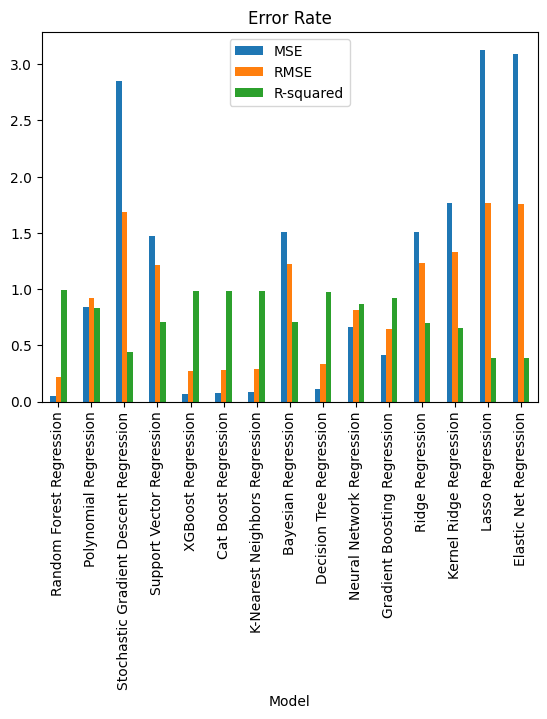

In [52]:
Model_Selection.plot(x='Model', kind="bar",title="Error Rate")

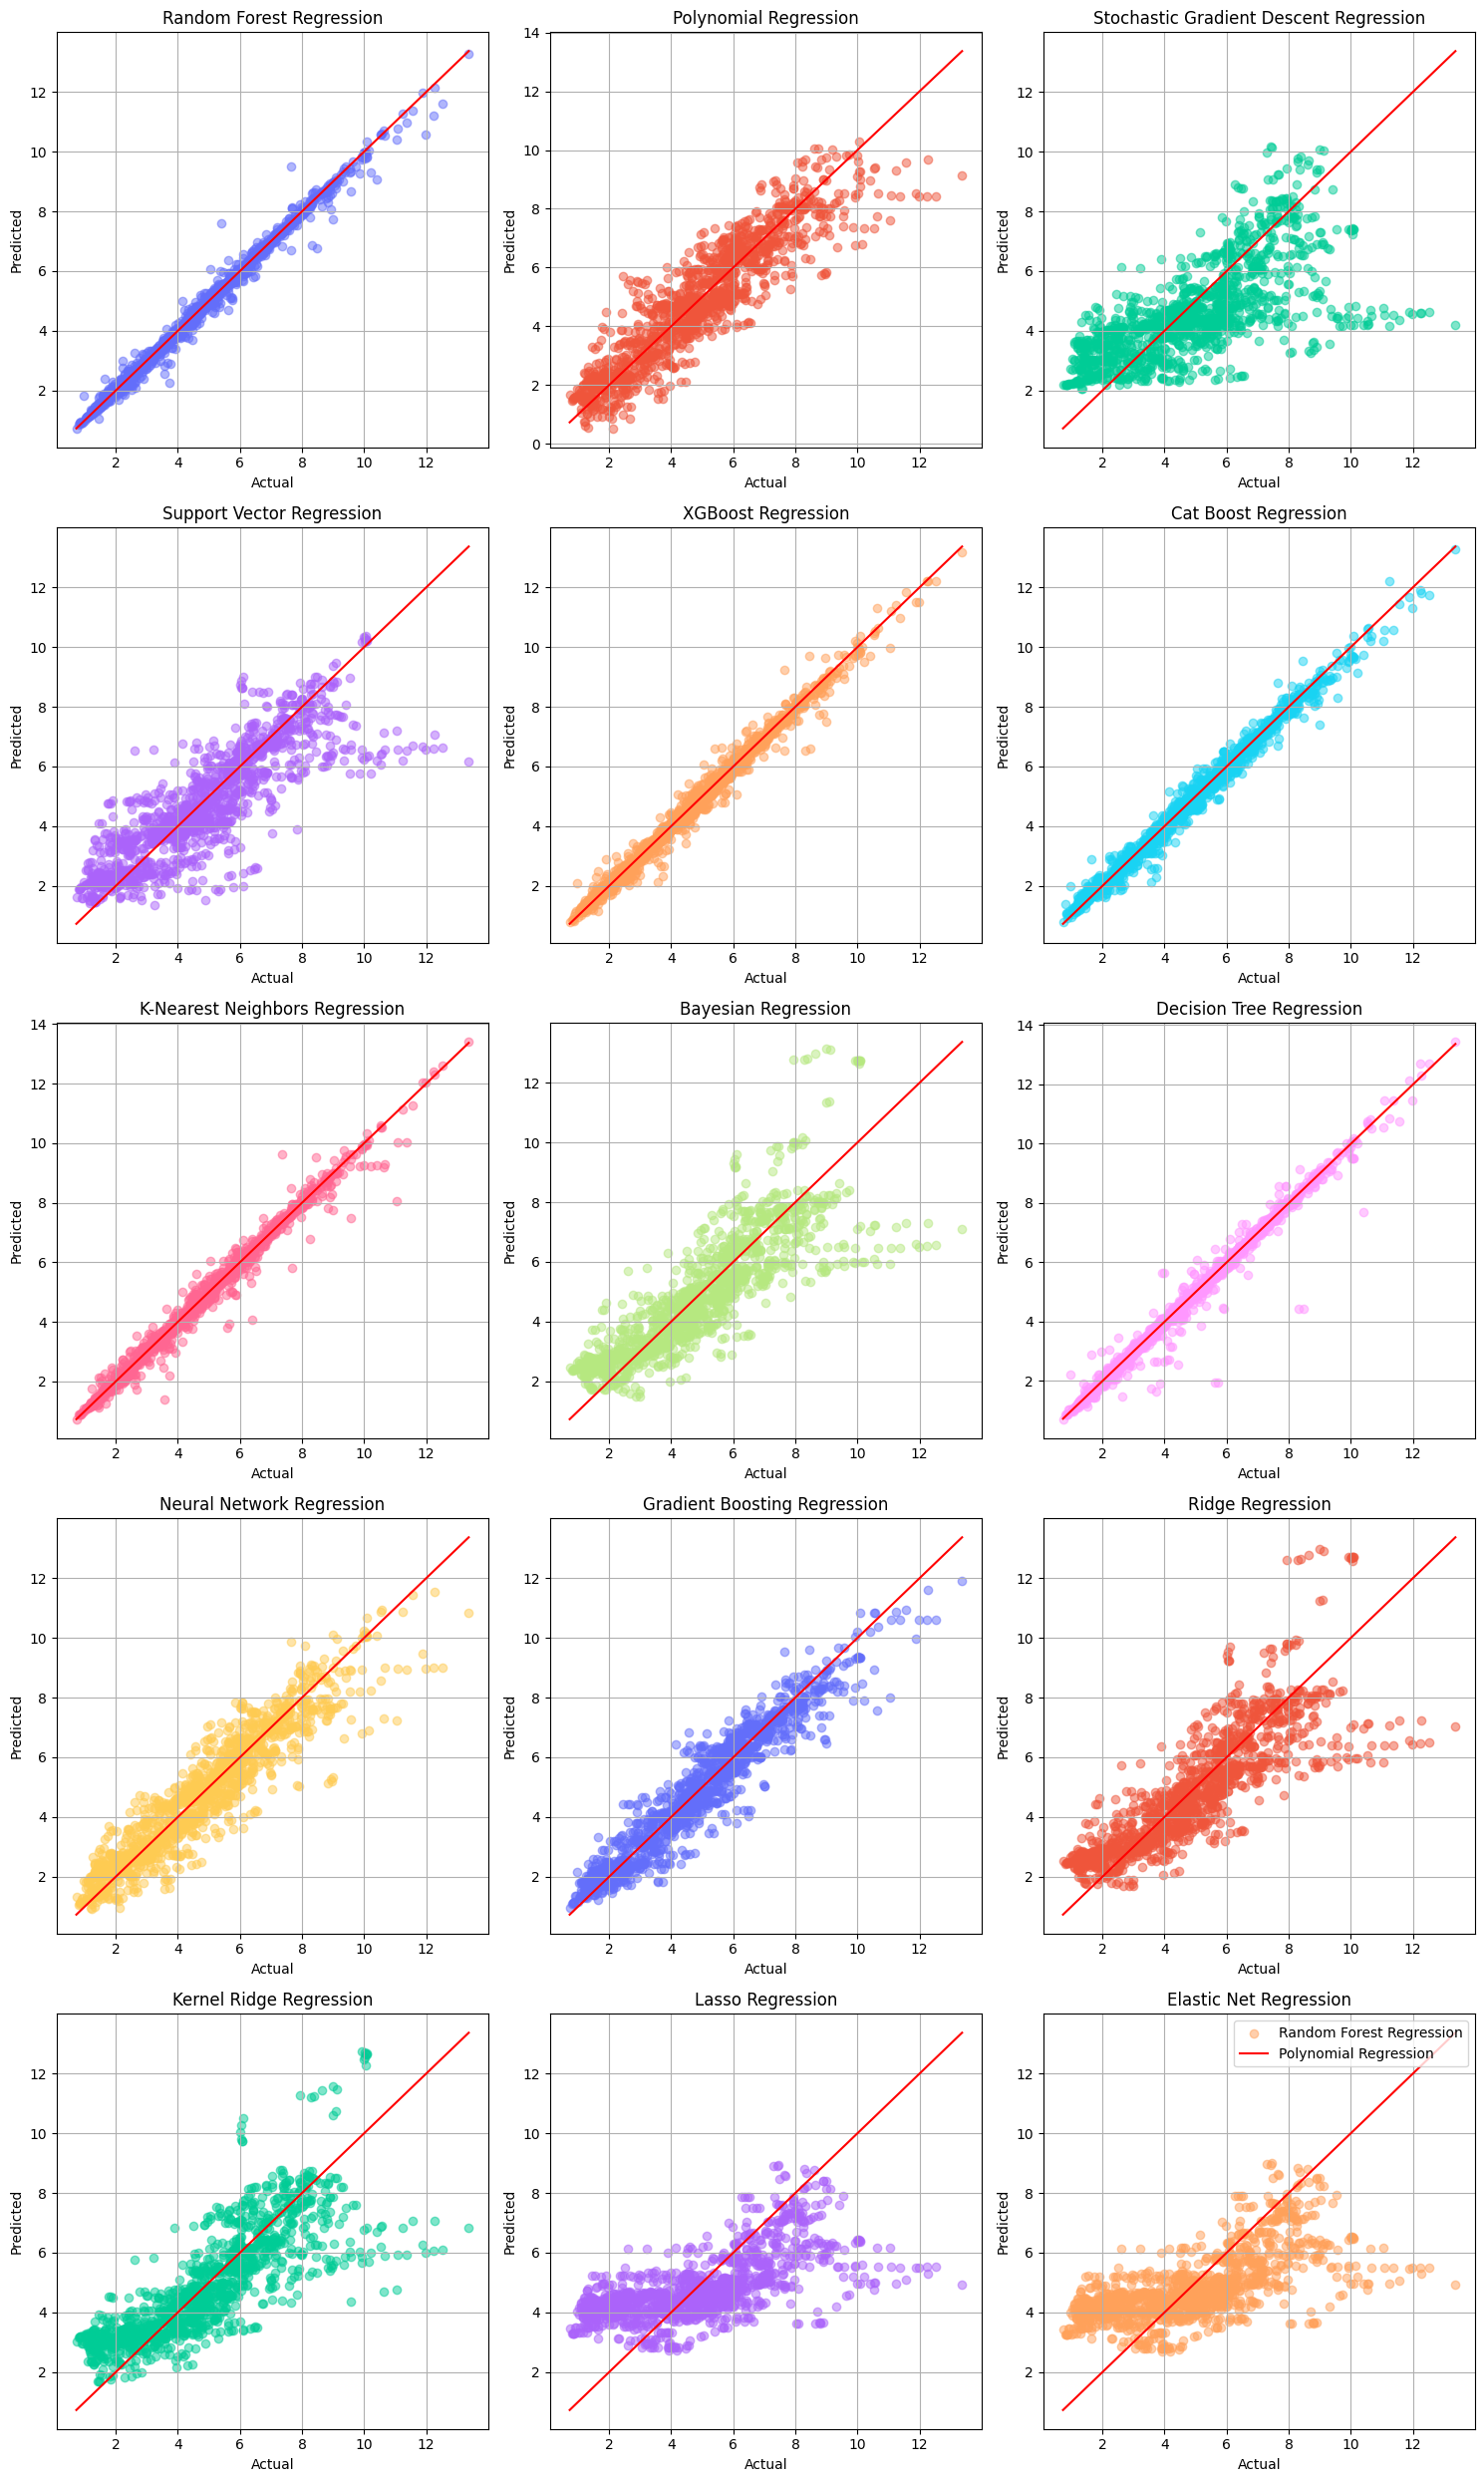

In [50]:
model_performance = {}
model_performance = {
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Stochastic Gradient Descent Regression': {'Predicted': SGDRegressor_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'Cat Boost Regression': {'Predicted': catboost_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test},
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Kernel Ridge Regression': {'Predicted': kernel_ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=next(palette), alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

In [55]:
Model_Selection.sort_values('MSE')

,Model,MSE,RMSE,Accuracy
1,Random Forest Regression,0.048879,0.221086,0.990391
5,XGBoost Regression,0.071913,0.268165,0.985863
6,Cat Boost Regression,0.079210,0.281442,0.984428
7,K-Nearest Neighbors Regression,0.085735,0.292806,0.983145
9,Decision Tree Regression,0.111214,0.333488,0.978136
11,Gradient Boosting Regression,0.418135,0.646633,0.917798
10,Neural Network Regression,0.661782,0.813500,0.869899
2,Polynomial Regression,0.842806,0.918045,0.834311
4,Support Vector Regression,1.474760,1.214397,0.710073
8,Bayesian Regression,1.506229,1.227285,0.703887
